## **ส่วนนี้เป็น Code พื้นฐานของ Project**
ประกอบไปด้วย Framework, Library, และ Config files
จำเป็นจะต้อง Run ให้ครบก่อน





In [1]:
# ทำการ Clone Repository เป็นอันดับแรก
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


In [2]:
# ส่วนนี้จะทำการเปลี่ยนค่าใน Makefile เพื่อเปิดใช้งาน GPU และ OPENCV รวมถึง CUDA
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# ส่วนนี้มีไว้เพื่อเช็คว่ามีการเรียกใช้งาน CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [4]:
# สั่ง Build Project
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
# ส่วนของการ Download custom config ซึ่งทำการแก้ไขค่าต่างๆเรียบร้อยแล้ว
%cd /content/darknet/cfg
!gdown https://drive.google.com/uc?id=1ixIP19lJSqjVnRdQrz4XMmfByxk1MezL

/content/darknet/cfg
Downloading...
From: https://drive.google.com/uc?id=1ixIP19lJSqjVnRdQrz4XMmfByxk1MezL
To: /content/darknet/cfg/yolov3_custom.cfg
100% 8.33k/8.33k [00:00<00:00, 13.9MB/s]


In [6]:
# ทำการ Download ตัว defined ค่า object ที่ทำการตั้งค่าต่างๆ เอาไว้
%cd /content/darknet/data
!gdown https://drive.google.com/uc?id=1zHPijEeVtAnfecZTpmCxs0EC50FgzEGq
!gdown https://drive.google.com/uc?id=1cXGPKr_Kjb6q0E6XTr3cWnYa6orLFk2j

/content/darknet/data
Downloading...
From: https://drive.google.com/uc?id=1zHPijEeVtAnfecZTpmCxs0EC50FgzEGq
To: /content/darknet/data/obj.data
100% 100/100 [00:00<00:00, 190kB/s]
Downloading...
From: https://drive.google.com/uc?id=1cXGPKr_Kjb6q0E6XTr3cWnYa6orLFk2j
To: /content/darknet/data/obj.names
100% 5.00/5.00 [00:00<00:00, 9.65kB/s]


## **หากต้องการ Train ให้ใช้ Code ดังต่อไปนี้**

In [7]:
# Code ส่วนนี้จะทำการ Download Dataset และแตกไฟล์
%cd /content/darknet/data
!mkdir obj
%cd /content/darknet/data/obj
!gdown https://drive.google.com/uc?id=1g-fQmk_gwqXht_mx0Th88hIH5eLHM8eY
!unrar e "dataset.rar"
!rm dataset.rar

/content/darknet/data
/content/darknet/data/obj
Downloading...
From: https://drive.google.com/uc?id=1g-fQmk_gwqXht_mx0Th88hIH5eLHM8eY
To: /content/darknet/data/obj/dataset.rar
100% 5.01M/5.01M [00:00<00:00, 67.4MB/s]

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from dataset.rar

Extracting  1.jpg                                                          0%  OK 
Extracting  1.txt                                                          0%  OK 
Extracting  1.xml                                                          0%  OK 
Extracting  10.jpg                                                         8%  OK 
Extracting  10.txt                                                         8%  OK 
Extracting  10.xml                                                         8%  OK 
Extracting  11.jpg                                                         9%  OK 
Extracting  11.txt                       

In [8]:
# Code ส่วนนี้จะทำการระบุ Path ของ Dataset แบบอัตโนมัติ และนำ Path ที่ได้ไปเก็บไว้เป็นไฟล์ Text
%cd /content/darknet/
import os

image_files = []
os.chdir(os.path.join("/content/darknet/data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

/content/darknet


In [9]:
# ทำการ upload pretrained weights เพื่อนำมาเทรนก่อนจะได้ตัว weights ใหม่
%cd /content/darknet
!wget http://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
--2022-11-11 10:14:26--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2022-11-11 10:14:27--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  17.1MB/s    in 10s     

2022-11-11 10:14:37 (15.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# Code สำหรับสั่ง Train Model เพื่อให้ได้ model.weights
# ทุกๆการ Train 100 และ 1000 iteration จะมีการ backup weights ไว้ที่ folder backup เพื่อป้องกันการสูญหายของข้อมูล
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.259674), count: 1, class_loss = 634.653625, iou_loss = 2.184937, total_loss = 636.838562 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 2009.641235, iou_loss = 0.000000, total_loss = 2009.641235 
 total_bbox = 3163, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.634612), count: 1, class_loss = 130.744934, iou_loss = 0.166306, total_loss = 130.911240 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.280582), count: 1, class_loss = 632.487610, iou_loss = 1.138550, total_loss = 633.626160 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 2001.103638, iou_loss = 0.000000, total_loss = 2001.103638 
 total_bbox = 3165, rewritte

In [ ]:
# หากมีการหยุด หรือต้องการ train ต่อจากที่ค้างไว้ ให้นำ weights ที่ได้จากการทำ backup มาระบุ path ใน parameter weights จากนั้น run code ด้านล่าง
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/darknet/yolov3_custom_last.weights -dont_show

## **หากต้องการ Test ให้ใช้ Code ดังต่อไปนี้**

In [10]:
# Download weights หรือ model ที่ได้จากการ Train ด้านบน
%cd /content/darknet
!gdown https://drive.google.com/uc?id=1R_-Qgpf1x9dyJ_XV4w-KDN35B7cZy1U0

/content/darknet
Downloading...
From: https://drive.google.com/uc?id=1R_-Qgpf1x9dyJ_XV4w-KDN35B7cZy1U0
To: /content/darknet/yolov3_custom_last.weights
100% 246M/246M [00:01<00:00, 186MB/s]


In [11]:
# Download ภาพที่จะนำมาใช้ Test
%cd /content/darknet/data
!mkdir testobj
%cd /content/darknet/data/testobj
!gdown https://drive.google.com/uc?id=1JPd316cqb3S0YDjp4MiFT5f0cVMKjaMv
!unrar e "carstotest.rar"

/content/darknet/data
/content/darknet/data/testobj
Downloading...
From: https://drive.google.com/uc?id=1JPd316cqb3S0YDjp4MiFT5f0cVMKjaMv
To: /content/darknet/data/testobj/carstotest.rar
100% 4.83M/4.83M [00:00<00:00, 58.1MB/s]

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from carstotest.rar

Extracting  s1.jpg                                                         2%  OK 
Extracting  s10.jpg                                                        5%  OK 
Extracting  s11.jpg                                                        9%  OK 
Extracting  s12.jpg                                                       10%  OK 
Extracting  s13.jpg                                                       16% 19%  OK 
Extracting  s14.jpg                                                       24% 28%  OK 
Extracting  s15.jpg                                                       36%  OK 
Extracting 

In [12]:
# เปลี่ยน config จากการ Train เป็น Testing
%cd /content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [13]:
# สร้าง function เพื่อใช้แสดงภาพ output
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

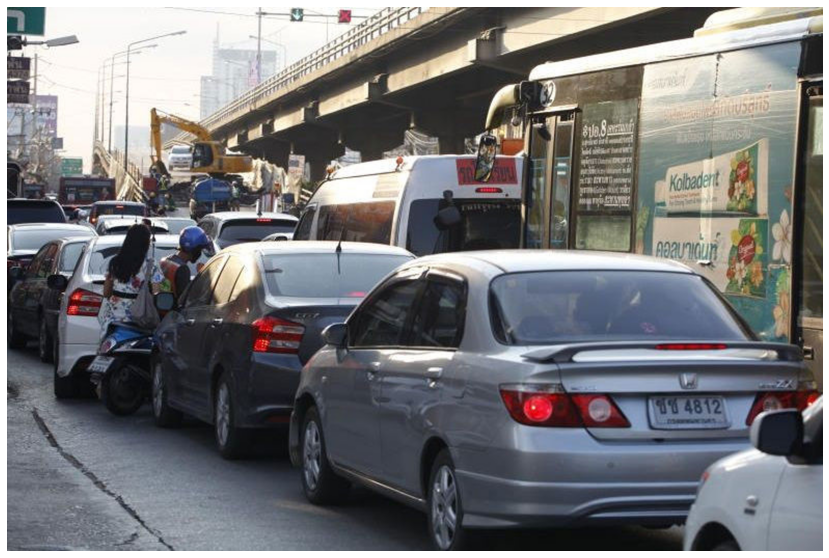

In [16]:
# code สำหรับ Test ต้องระบุ path ของรูปให้ถูกต้อง
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/darknet/yolov3_custom_last.weights /content/darknet/data/testobj/s1.jpg
imShow('predictions.jpg')